<a href="https://colab.research.google.com/github/mmorari-cmyk/CURSO_SE.ALES_Y_SISTEMAS/blob/main/Taller2/2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2.4**

/tmp/ipython-input-1327043401.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ym[i, i] = float(xm[:, i].T.dot(hm))  # escalar


interactive(children=(IntSlider(value=0, description='k', max=12), Output()), _dom_classes=('widget-interact',…

Salida y[n] = [-15, 35, -13, -9, 40, -16, -9, 7, -3, -15, 2]


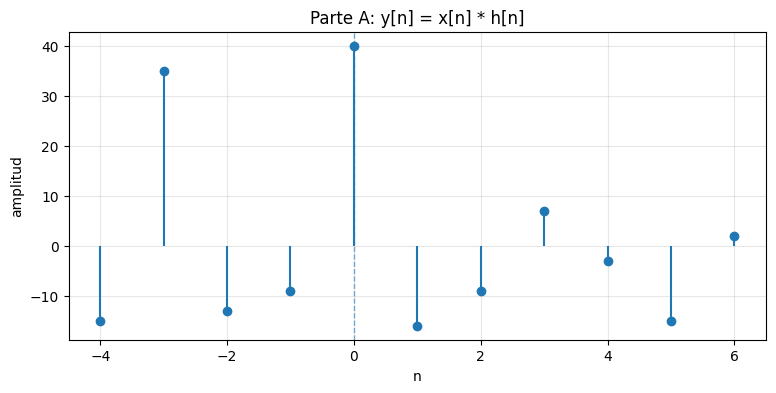

In [18]:
# PARTE A: y[n] = x[n] * h[n] (h dado)


%matplotlib inline
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

# Señales del enunciado
h = np.array([1, -2, 0, 1, -2]).reshape(-1,1)          # n0_h = 2 (3er elemento)
x = np.array([-15, 5, -3, 0, 5, 7, -1]).reshape(-1,1)  # n0_x = 2 (3er elemento)

# Método gráfico (voltear–desplazar–sumar)
def convgraf(h, x):
    lx, lh = len(x), len(h)
    M = 2*lx + lh
    xm = np.zeros((M, M))
    hm = np.r_[np.zeros((lx,1)), h, np.zeros((lx,1))]
    ym = np.zeros((M, M))
    for i in range(M - lx + 1):
        xm[i:i+lx, i] = np.flip(x).reshape(-1)
        ym[i, i] = float(xm[:, i].T.dot(hm))  # escalar
    return xm, ym, hm

def plot_conv(k, xm, ym, hm, tag="Parte A (h dado)"):
    plt.figure(figsize=(8,4))
    plt.stem(xm[:,k], markerfmt='+', basefmt=' ', label='$x[k]$')
    plt.stem(hm, linefmt='g', markerfmt='.', basefmt=' ', label='$h[n-k]$')
    plt.stem(ym[:k,:].sum(axis=0), markerfmt='s', linefmt='r', basefmt=' ',
             label='$y[n]=\\sum x[k]h[n-k]$')
    plt.legend(); plt.grid(True, alpha=0.3); plt.title(f"{tag} – Etapa k = {k}")
    plt.show()

# Interactivo
xm, ym, hm = convgraf(h, x)
@interact(k=(0, xm.shape[0]-len(x), 1))
def show_frame_A(k=0):
    plot_conv(k, xm, ym, hm)

# Comprobación y gráfica final
y = np.convolve(x.reshape(-1), h.reshape(-1))
print("Salida y[n] =", y.tolist())  # [-15, 35, -13, -9, 40, -16, -9, 7, -3, -15, 2]

n0_x, n0_h = 2, 2
n = np.arange(-(n0_x+n0_h), -(n0_x+n0_h) + len(y))
plt.figure(figsize=(9,4))
plt.stem(n, y, basefmt=' ')
plt.axvline(0, ls='--', lw=1, alpha=0.6)
plt.title("Parte A: y[n] = x[n] * h[n]")
plt.xlabel("n"); plt.ylabel("amplitud"); plt.grid(True, alpha=0.3)
plt.show()


# Ejercicio: Sistema dado por RESPUESTA AL ESCALÓN
# s[n] = {-1, 6, -10, 3†, 1, -10, 2, 5} († => n=0 en el 4º elemento)

/tmp/ipython-input-3232291722.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ym[i, i] = float(xm[:, i].T.dot(hm))


interactive(children=(IntSlider(value=0, description='k', max=14), Output()), _dom_classes=('widget-interact',…

h[n] desde escalón = [7, -16, 13, -2, -11, 12, 3]
Salida y[n] = [-105, 275, -296, 143, 151, -260, -6, 76, -91, -15, 110, 9, -3]


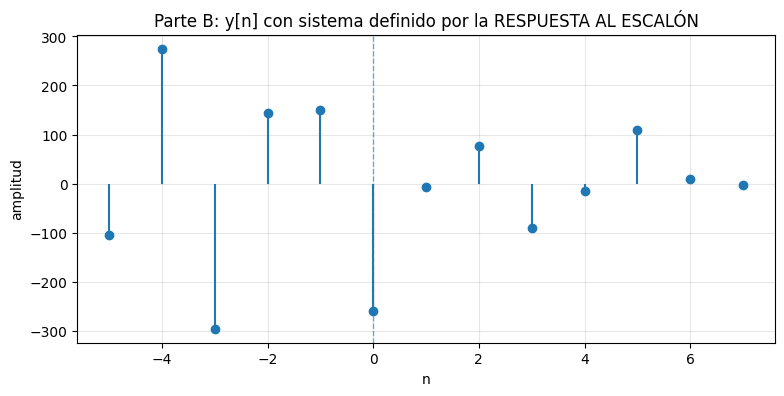

In [19]:
# PARTE B: Sistema definido por la RESPUESTA AL ESCALÓN


%matplotlib inline
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

# Entrada y escalón del enunciado
x = np.array([-15, 5, -3, 0, 5, 7, -1]).reshape(-1,1)         # n0_x = 2
s = np.array([-1, 6, -10, 3, 1, -10, 2, 5]).reshape(-1,1)     # n0_s = 3 († en el 4º)

# Respuesta al impulso desde el escalón: h[n] = s[n] - s[n-1]
h = np.diff(s, axis=0)                                        # [7,-16,13,-2,-11,12,3]
n0_h = 3

# Método gráfico
def convgraf(h, x):
    lx, lh = len(x), len(h)
    M = 2*lx + lh
    xm = np.zeros((M, M))
    hm = np.r_[np.zeros((lx,1)), h, np.zeros((lx,1))]
    ym = np.zeros((M, M))
    for i in range(M - lx + 1):
        xm[i:i+lx, i] = np.flip(x).reshape(-1)
        ym[i, i] = float(xm[:, i].T.dot(hm))
    return xm, ym, hm

def plot_conv(k, xm, ym, hm, tag="Parte B (desde escalón)"):
    plt.figure(figsize=(8,4))
    plt.stem(xm[:,k], markerfmt='+', basefmt=' ', label='$x[k]$')
    plt.stem(hm, linefmt='g', markerfmt='.', basefmt=' ', label='$h[n-k]$')
    plt.stem(ym[:k,:].sum(axis=0), markerfmt='s', linefmt='r', basefmt=' ',
             label='$y[n]=\\sum x[k]h[n-k]$')
    plt.legend(); plt.grid(True, alpha=0.3); plt.title(f"{tag} – Etapa k = {k}")
    plt.show()

# Interactivo
xm, ym, hm = convgraf(h, x)
@interact(k=(0, xm.shape[0]-len(x), 1))
def show_frame_B(k=0):
    plot_conv(k, xm, ym, hm)

# Comprobación y gráfica final
y = np.convolve(x.reshape(-1), h.reshape(-1))
print("h[n] desde escalón =", h.reshape(-1).tolist())         # [7,-16,13,-2,-11,12,3]
print("Salida y[n] =", y.tolist())                             # [-105, 275, -296, 143, 151, -260, -6, 76, -91, -15, 110, 9, -3]

n0_x = 2
n = np.arange(-(n0_x+n0_h), -(n0_x+n0_h) + len(y))            # n0_y = 5
plt.figure(figsize=(9,4))
plt.stem(n, y, basefmt=' ')
plt.axvline(0, ls='--', lw=1, alpha=0.6)
plt.title("Parte B: y[n] con sistema definido por la RESPUESTA AL ESCALÓN")
plt.xlabel("n"); plt.ylabel("amplitud"); plt.grid(True, alpha=0.3)
plt.show()
